# Modelo Económico Piloto Agrícola C3 AI Nicaragua

## Objetivo

Estimar el **beneficio económico** del piloto de Optimización del Programa de Cosecha **(PSO)** de C3 AI, por medio del uso de KPI's de proceso que se impactan en el proceso de optimización.
Este optimizador tiene alcance en los siguientes procesos agrícolas:
- Cosecha Guatemala
- Cosecha Nicaragua

El objetivo del optimizador es recomendar los valores de variables de decisión (frente, finca, momento) en el proceso de cosecha que *maximicen la cantidad de azúcar recuperada por medio de un incremento en la pol y la pureza de la caña cosechada*.

Dado que **el objetivo del optimizador es reemplazar las decisiones operativas humanas**, al momento de adoptarlo se pierde la línea base que sirve para comparar. Por este motivo se seleccionó un proceso de **back-testing** para explicar (durante un período en el que el optimizador no operó) *qué hubiera ocurrido si las recomendaciones del optimizador se hubieran seguido*, y por lo tanto la línea base se convierte en el desempeño real del proceso en el pasado. Este es un ejercicio teórico que se vale de los modelos predictivos que se desarrollaron para las funciones objetivo del optimizador. 

***La diferencia entre la línea base y el escenario hipotético del optimizador sirve para estimar el beneficio debido al uso del optimizador.***

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Estimación de Beneficios Promedios

#### KPI's de Caña de Azúcar
Se utilizan los siguientes KPI's de *Caña de Azúcar* entregada a PSA:
- Pol en Caña (%).
- Pureza en Caña (%).
- Caña bajo administración propia a moler (t caña).

#### KPI's de Azúcar Industrial
- Beneficio Marginal por Tonelada de Azúcar (USD / t azúcar).
- Pol ponderado de Azúcar (%).

#### KPI's de Transporte
- Costo Promedio de Ferry Frente Manual (USD/km-frente).
- Costo Promedio de Ferry Frente Mecánico (USD/km-frente).
- Distancia Total de Ferrys Frentes Manuales (km)
- Distancia Total de Ferrys Frentes Mecánicos (km)

#### KPI's Piloto Agrícola PSA
Los siguientes KPI's son impactados por el *piloto de optimización PSO*:
- Pol en Caña Optimizado (%).
- Pureza en Caña Optimizada (%).
- Distancia Total de Ferrys Frentes Manuales Optimizados (km).
- Distancia Total de Ferrys Frentes Mecánicos Optimizados (km).

## Estimación de Beneficios Promedio

#### Estimación de Beneficios por Azúcar Adicional

Para estimar la cantidad de azúcar adicional se utilizan las siguientes ecuaciones:

- $\Delta PolCaña = PolCaña_{Optimizador} - PolCaña$

- $\Delta PurezaCaña = PurezaCaña_{Optimizador} - PurezaCaña$

- $\Delta Azucar_{Pol} = \Delta PolCaña * Caña_{Optimización}$

- $RecuperaciónGlobal_{Estimada} = 1.0093*PurezaCaña_{Optimizador} - 0.0406$

- $\Delta Azucar_{Industrial} = \Delta Azucar_{Pol} * RecuperaciónGlobal_{Estimada} / Pol_{Industrial}$

- $Beneficio_{Azúcar} = BeneficioMarginal_{Azucar} * \Delta AzucarIndustrial$

Donde:

$RecuperaciónGlobal_{Estimada}$ es una función que estima la recuperación global de la fábrica basado en pureza de caña.

#### Estimación de Costos Adicionales por Distancias de Ferry de Frentes

Dado que potencialmente se incurre en costos adicionales por mayor movimiento de frentes, se estima el diferencial de costos con las siguientes ecuaciones:

- $\Delta DistanciaFerryManuales = DistanciaFerryManuales_{Optimizado} - DistanciaFerryManuales$

- $\Delta DistanciaFerryMecanicos = DistanciaFerryMecanicos_{Optimizado} - DistanciaFerryMecanicos$

- $\Delta CostoTotalFerry = \Delta DistanciaFerryManuales * CostoFerryManual + \Delta DistanciaFerryMecanicos * CostoFerryMecanico$

Donde:

Los costos de Ferry (traslado de un frente de una finca a otra) son expresados en USD/km-frente.

In [7]:
# KPI's

# Caña
Pol_Cana = 15.16
Pol_Cana_opt = 15.46
Pureza_Cana = 84.08
Pureza_Cana_opt = 84.08
Total_Cana_BA =  1394500.00 

# Transporte
Dist_Ferry_Manuales = 5000
Dist_Ferry_Manuales_opt = 4572
Dist_Ferry_Mecanicos = 79062.52
Dist_Ferry_Mecanicos_opt = 100000
Costo_Ferry_Manual = 2.43
Costo_Ferry_Mecanico = 3.11

# Azúcar
Pol_Az_Industrial = 99.59
Ben_Marginal_Az = 314.16

# Variables
Delta_Pol_Cana = (Pol_Cana_opt - Pol_Cana)/100
RG_Estimada = 1.0093*Pureza_Cana_opt/100 - 0.022
Delta_Az_Pol = Delta_Pol_Cana * Total_Cana_BA
Delta_Az_Ind = Delta_Az_Pol * RG_Estimada / (Pol_Az_Industrial / 100)
Delta_Ben_Az = Delta_Az_Ind * Ben_Marginal_Az

Delta_Dist_Ferry_Manuales = Dist_Ferry_Manuales_opt - Dist_Ferry_Manuales
Delta_Dist_Ferry_Mecanicos = Dist_Ferry_Mecanicos_opt - Dist_Ferry_Mecanicos
Delta_Costo_Total_Ferry = Delta_Dist_Ferry_Manuales * Costo_Ferry_Manual + Delta_Dist_Ferry_Mecanicos * Costo_Ferry_Mecanico

Ben_Total = Delta_Ben_Az - Delta_Costo_Total_Ferry

print("Mejora en Pol en Caña: %.2f" % (Delta_Pol_Cana*100))
print("Recuperación Global Estimada: %.2f" % (RG_Estimada*100))
print("Azúcar Industrial Adicional (toneladas): %.2f" % Delta_Az_Ind)
print("Costo Ferry Adicional (USD): %.2f" % Delta_Costo_Total_Ferry)
print("Beneficio Total Adicional (USD): %.2f" % Ben_Total)

Mejora en Pol en Caña: 0.30
Recuperación Global Estimada: 82.66
Azúcar Industrial Adicional (toneladas): 3472.40
Costo Ferry Adicional (USD): 64075.52
Beneficio Total Adicional (USD): 1026813.43


## Estimación de Beneficios Probabilísticos
Se considera la naturaleza probabilística de los resultados del optimizador para simular la distribución resultante de los beneficios.

In [8]:
# Función de Beneficio Económico con Parámetros Teóricos de Mejora por el Optimizador
def beneficio_economico(pol_cana_opt, pureza_cana_opt):

    # Beneficio
    Delta_Pol_Cana = (pol_cana_opt - Pol_Cana)/100
    RG_Estimada = 1.0093*pureza_cana_opt/100 - 0.022
    Delta_Az_Pol = Delta_Pol_Cana * Total_Cana_BA
    Delta_Az_Ind = Delta_Az_Pol * RG_Estimada / (Pol_Az_Industrial / 100)
    Delta_Ben_Az = Delta_Az_Ind * Ben_Marginal_Az

    Delta_Dist_Ferry_Manuales = Dist_Ferry_Manuales_opt - Dist_Ferry_Manuales
    Delta_Dist_Ferry_Mecanicos = Dist_Ferry_Mecanicos_opt - Dist_Ferry_Mecanicos
    Delta_Costo_Total_Ferry = Delta_Dist_Ferry_Manuales * Costo_Ferry_Manual + Delta_Dist_Ferry_Mecanicos * Costo_Ferry_Mecanico

    Ben_Total = Delta_Ben_Az - Delta_Costo_Total_Ferry

    return Ben_Total

In [9]:
beneficio_economico(15.46,84.08)

1026813.4300483997

### Simulación
Se realiza una simulación de Monte Carlo dada la naturaleza probabilística del beneficio del optimizador.

In [10]:
# parametros distribucion
mu_pol, sigma_pol = 15.46 , 0.05
mu_pureza, sigma_pureza = 84.08, 3.0

# muestreo
n_simulations = 1000
l_xs = []
l_ys = []

# simulaciones
for _ in range(n_simulations):
    
    # pol_cana se muestrea aleatoriamente con una distribución normal con media mu y desviación estándar sigma
    x = np.random.normal(mu_pol, sigma_pol)
    l_xs.append(x)
    
    # pureza_caña se muestrea aleatoriamente con una distribución normal con media mu y desviación estándar sigma
    y = np.random.normal(mu_pureza, sigma_pureza)
    l_ys.append(y)

In [11]:
# evaluación
l_bs = []
for i in range(n_simulations):
    
    # beneficios económicos de la muestra
    beneficios = beneficio_economico(l_xs[i],l_ys[i])
    l_bs.append(beneficios)

In [12]:
# Dataframe de Simulaciones

# listas de simulación
inc_rend_azucar = l_xs
inc_sacarosa_melaza = l_ys
beneficio = l_bs
 
# diccionario de listas
dict = {'Pol en Caña (%)': inc_rend_azucar, 'Pureza en Caña (%)': inc_sacarosa_melaza, 'Beneficio Económico (USD)': beneficio} 

# dataframe final
df = pd.DataFrame(dict)
df

,Pol en Caña (%),Pureza en Caña (%),Beneficio Económico (USD)
0,15.535498,79.348942,1.222472e+06
1,15.523091,83.017185,1.239096e+06
2,15.386645,81.303587,7.321356e+05
3,15.461981,82.718856,1.015768e+06
4,15.445465,89.288154,1.039969e+06
...,...,...,...
995,15.396649,83.854694,7.940847e+05
996,15.409667,78.296877,7.796810e+05
997,15.464689,85.032551,1.056751e+06
998,15.480205,86.043359,1.128198e+06


array([[<Axes: title={'center': 'Pol en Caña (%)'}>,
        <Axes: title={'center': 'Pureza en Caña (%)'}>],
       [<Axes: title={'center': 'Beneficio Económico (USD)'}>, <Axes: >]],
      dtype=object)

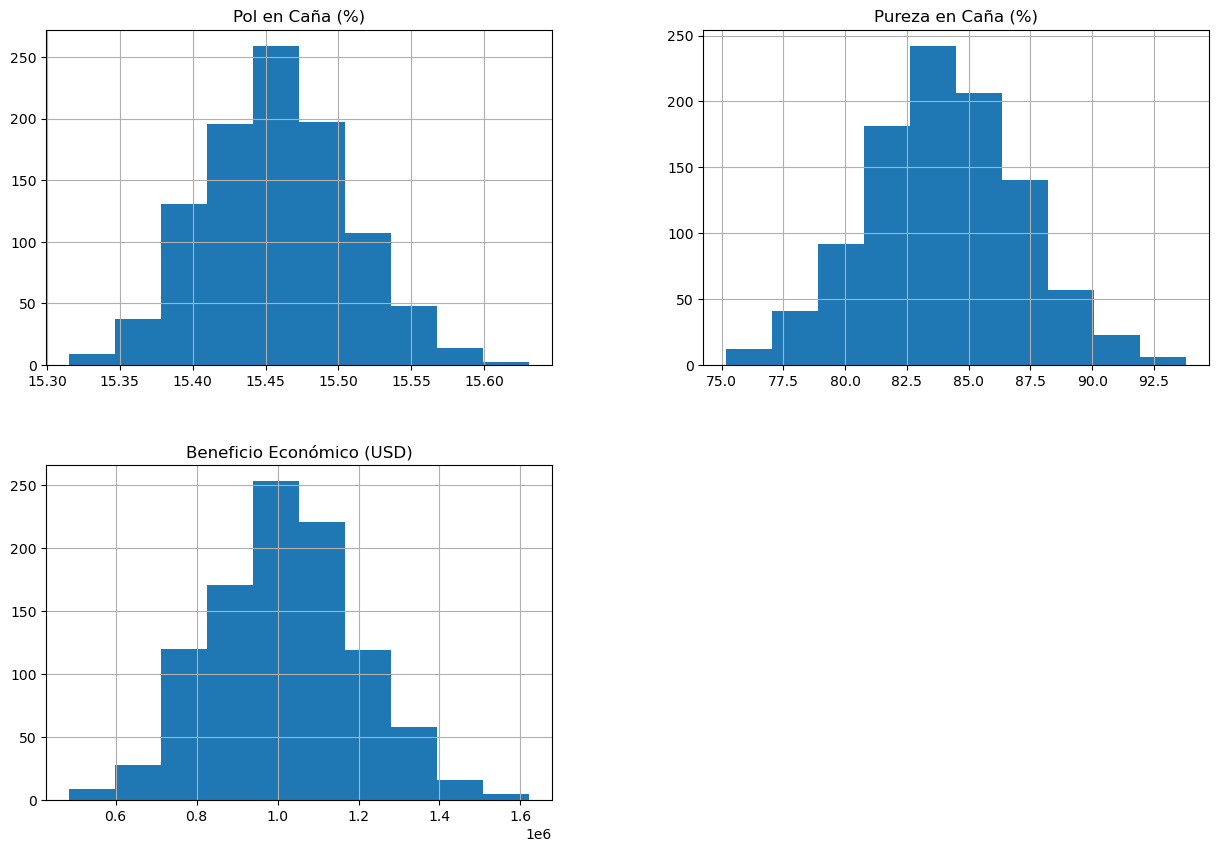

In [15]:
df.hist(figsize=(15,10))

In [16]:
df['Beneficio Económico (USD)'].describe()

count    1.000000e+03
mean     1.018716e+06
std      1.817912e+05
min      4.856912e+05
25%      8.891182e+05
50%      1.018675e+06
75%      1.138033e+06
max      1.620622e+06
Name: Beneficio Económico (USD), dtype: float64